0.979995584367


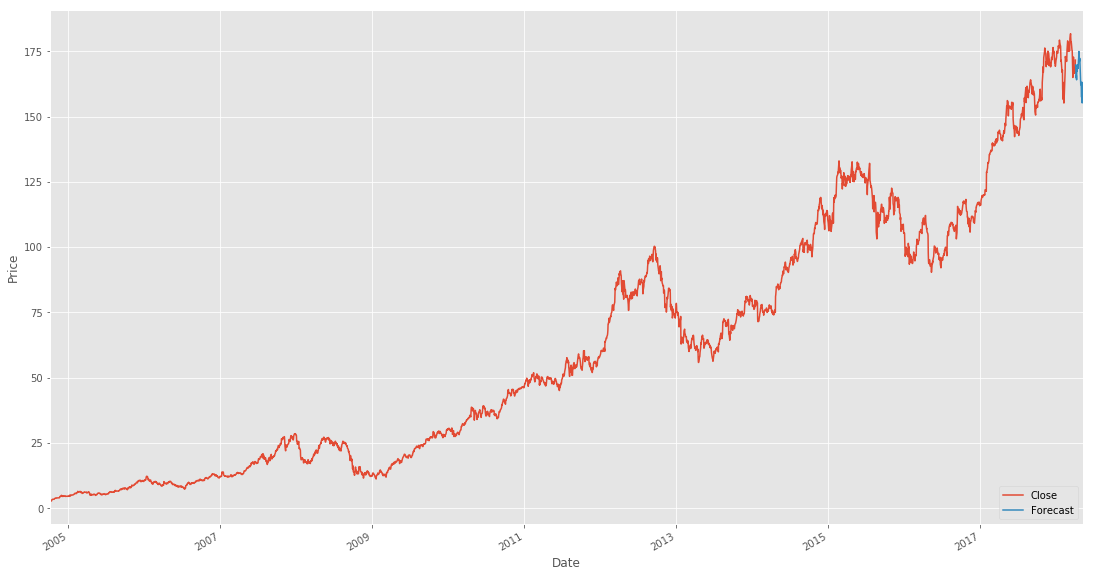

In [6]:
import pandas 
import quandl
import math, datetime
import time
import numpy as np
import sklearn
from pandas.tools.plotting import scatter_matrix
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from matplotlib import style

style.use('ggplot')

df = pandas.read_csv('AAPL.csv',header=0,index_col='Date',parse_dates=True)

df ['OC_Change'] = (df['Close']-df['Open'])/ df['Open'] *100
df ['HL_Change'] = (df['High']-df['Low'])/ df['Low'] *100

df=df[['Close', 'HL_Change','OC_Change','Volume']]


forecast_col = 'Close'

forecast_out = int(math.ceil(0.01*len(df)))

df['label'] = df[forecast_col].shift(--forecast_out)

df.dropna(inplace=True)

X = np.array(df.drop(['label'],1))
Y = np.array(df['label'])

X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(X,Y,test_size=0.2)

clf = LinearRegression()

clf.fit(X_train,Y_train)

accuracy=clf.score(X_test, Y_test)

print(accuracy)

X =  X[:-forecast_out]

X_lately = X[-forecast_out:]
Forecast_set = clf.predict(X_lately)

df['Forecast'] = np.nan



last_date = df.iloc[-1].name
last_unix = last_date.timestamp()
one_day = 86400
next_unix = last_unix + one_day

for i in Forecast_set:
    next_date = datetime.datetime.fromtimestamp(next_unix)
    next_unix += 86400
    df.loc[next_date] = [np.nan for _ in range(len(df.columns)-1)] + [i]
    
df['Close'].plot()

df['Forecast'].plot()

plt.legend(loc=4)

plt.xlabel('Date')

plt.ylabel('Price')

plt.show()

fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
fig.savefig('test2png.png', dpi=100)
